'=> Area b/w raw-S11 and theta(scaled[-1 to 1]) ='

0.05643090821072818

'=> Area b/w scaled-S11 and theta(scaled[-1 to 1]) ='

1.9999999999999998

'=> Legendre-Coefficients (lambda_j) ='

'[1.00000000e+00 4.90629356e-01 5.45340884e-01 9.92047718e-02\n 8.64016825e-03 6.79261006e-04 1.03589700e-03]'

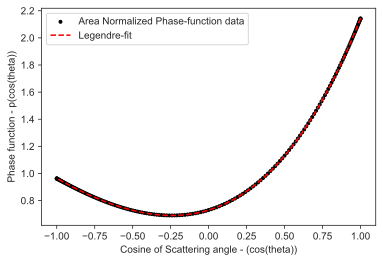

In [3]:
from scipy.special import legendre

from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'

import os
import pandas as pd
import glob


# Upload the data
S11_df0 = pd.read_csv(r"C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\Radiative Transfer Modelling\HW1 - Layer Optical Calculations\RT_Run1\Tarball-Properties\TarBall_0.350nm\Cluster_1\mueller", index_col=None, header=0, delimiter=" ")
S11_df = S11_df0[["theta", "s11"]]
np.savetxt(r'S11-File.txt', S11_df.values)


# Make the phase function symmetric: Change range from: (0 to pi) => (-pi to pi)
# negative_S11_df = S11_df.iloc[179:0:-1].copy() # Always make a copy of the dataframes, else changes get referenced.
# negative_S11_df["theta"] = -1*(negative_S11_df["theta"])
# Full_S11_df = negative_S11_df.append(S11_df)
# Full_S11_df.reset_index(inplace=True, drop=True)
# S11_df = Full_S11_df # S11_df is now from -179 to 180 degrees


# Scale the S11 values OR phase function to area=1 and theta to -1 to 1
S11_df["mu"] = np.cos(S11_df["theta"]*(np.pi/180)) # Theta(Degrees) -> Theta(Radians) -> Cos(theta) -> -1 to 1
Y = S11_df["s11"] # To be scaled in the next step
X = S11_df["mu"] #S11_df["theta"]*np.pi/180

raw_area = np.abs(np.trapz(Y, X)) # Area b/w raw S11 values and scaled-theta
display("=> Area b/w raw-S11 and theta(scaled[-1 to 1]) =", raw_area)
Y = (Y /raw_area)*2 # Scale the phase function to make the area 2 so that first legendre coefficient can be 1
new_area = np.abs(np.trapz(Y, X)) # Normalizign area b/w S11 and theta
display("=> Area b/w scaled-S11 and theta(scaled[-1 to 1]) =", new_area)


# Compute the legendre coefficients: 
# Reference: https://math.stackexchange.com/questions/2147167/finding-coefficients-of-legendre-polynomials
order_of_approx = 7
lambda_j_array = np.zeros(order_of_approx)
for j in range(order_of_approx):
    lambda_j_array[j] = ((2*j+1)/2) * np.abs(np.trapz(Y*legendre(j, monic=False)(X), X))


# Define series of legendre decompositon of phase function for plotting
def legendre_approx_function(order_of_approx, lambda_j_array, X):
    approx_sum = 0
    for j in range(order_of_approx):
        temp = lambda_j_array[j]*legendre(j, monic=False)(X)
        approx_sum = approx_sum + temp
    return approx_sum

# Plot the Data
display("=> Legendre-Coefficients (lambda_j) =",f"{lambda_j_array}")
plt.scatter(X, Y, label="Area Normalized Phase-function data", color="black", marker=".")
plt.plot(X, legendre_approx_function(order_of_approx, lambda_j_array, X), color="red", label="Legendre-fit", linestyle="--")
plt.legend()
plt.xlabel("Cosine of Scattering angle - (cos(theta))")
plt.ylabel("Phase function - p(cos(theta))")
plt.show()

In [ ]:
# S11_df0 = pd.read_csv(r"C:\Users\joshi\Desktop\phase_function_500nm_reff10.xlsx", index_col=None, sep=" ")
# # S11_df0.rename({"# theta [degrees]": "theta", "phase function": "s11"}, inplace=True)

# S11_df0.columns

In [ ]:
# negative_S11_df = S11_df.iloc[179:0:-1].copy() # Always make a copy of the dataframes, else changes get referenced.
# negative_S11_df["theta"] = -1*(negative_S11_df["theta"])
# Full_S11_df = negative_S11_df.append(S11_df)
# Full_S11_df.reset_index(inplace=True, drop=True)
# Full_S11_df

# plt.plot(Full_S11_df["theta"], Full_S11_df["s11"])
# plt.show()

###
# lambda_j_array[0] = 0.999964 
# lambda_j_array[1] = 0.490686 
# lambda_j_array[2] = 0.544771 
# lambda_j_array[3] = 0.0992346 
# lambda_j_array[4] = 0.00760815 
# lambda_j_array[5] = 0.000741354 
# lambda_j_array[6] = -0.000451556

In [ ]:
# plt.plot(S11_df["mu"], S11_df["s11"])
# plt.show()

# import scipy.integrate as integrate
# import scipy.special as special

# # display(np.trapz(S11_df["s11"], S11_df["mu"]))
# a = (S11_df["s11"]*S11_df["mu"]).astype(float)
# display(a)
# display(integrate.quad(lambda x: a, -1, 1))


S11_df